# DNA Quantification for Internal Standards (IS)

Lexi Jones-Kellett

#### Spike-ins
DNA extractions were performed in 12 batches. Every sample was spiked with three internal standards: Blautia_producta (BP), Deinococcus_radiodurans (DR), Thermus_thermophilus (TT).

#### DNA Concentrations of IS Protocol
We measured the concentration of the internal standards with a Pico-Green dsDNA Quant-iT Assay Kit on a Synergy H1 microplate reader (Agilent) using 96-well plates (clear-bottom / black side, Corning #3651) using excitation/emission wavelengths of 485/538nm. We carried out all dilutions of the samples and Pico-Green reagents in low-EDTA TE buffer to prevent DNA degradation. Assays were conducted by first adding samples to 100 μL low-EDTA TE in 96-well plates, followed by adding 100 μL Pico-Green dye diluted to the working concentration with an automatic repeating pipettor. We incubated the samples in the dark for 10 minutes before measurement on the plate reader. The total reaction volume was 200 μL plus 1-10 μL of the sample (depending on the concentrations measured; total volume was always consistent within each assay). Lambda phage DNA was used as a standard and diluted from a 100 ng/μL stock in low-EDTA TE (always stored at 4°C) immediately before measurement.

We quantified the DNA concentrations three times (Q1,Q2,Q3), and during each run the DNA was measured twice (a,b).

NOTE: Q2 had an error, so only Q1 and Q3 are used here to estimate the DNA concentrations. 

In [1]:
import csv,json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# config file contains local directory paths
with open("conf.json") as json_conf : 
    config = json.load(json_conf)

In [3]:
# Plot fontsize params
fontsize = 18

plt.rc('font', size=fontsize)          # controls default text sizes
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=fontsize)    # legend fontsize
plt.rc('figure', titlesize=fontsize)  # fontsize of the figure title

#### Open DNA quant data obtained following the PicoGreen protocol

In [4]:
filename = 'internal_standards_DNA_quant_round_one_and_three.csv'

internal_standards = []
with open(config["data_dir"] + filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    i = 0
    for row in csv_reader:
        if i != 0:
            internal_standards.append(row)
        i += 1
internal_standards = np.array(internal_standards)

Organize replicates into a dictionary

In [5]:
bp_dict,dr_dict,tt_dict = {},{},{}
for i in internal_standards:
    name,q1,q3 = i[0],float(i[1]),float(i[2])
    split_name = name.split('-')
    dict_name = split_name[0][2:] + split_name[2]
    
    if split_name[1] == 'bp':      
        bp_dict[dict_name + '-q1'] = q1
        bp_dict[dict_name + '-q3'] = q3
    elif split_name[1] == 'dr':      
        dr_dict[dict_name + '-q1'] = q1
        dr_dict[dict_name + '-q3'] = q3
    elif split_name[1] == 'tt':      
        tt_dict[dict_name + '-q1'] = q1
        tt_dict[dict_name + '-q3'] = q3
        
bp_dict

{'1a-q1': 0.175350186,
 '1a-q3': 0.162585263,
 '1b-q1': 0.162958858,
 '1b-q3': 0.154735818,
 '2a-q1': 0.169412675,
 '2a-q3': 0.199361366,
 '2b-q1': 0.171736048,
 '2b-q3': 0.184825357,
 '3a-q1': 0.172897735,
 '3a-q3': 0.162294543,
 '3b-q1': 0.171090667,
 '3b-q3': 0.163602784,
 '4a-q1': 0.183998299,
 '4a-q3': 0.162294543,
 '4b-q1': 0.173026812,
 '4b-q3': 0.163893504,
 '5a-q1': 0.188515971,
 '5a-q3': 0.172469749,
 '5b-q1': 0.189419505,
 '5b-q3': 0.182935676,
 '6a-q1': 0.177544483,
 '6a-q3': 0.17319655,
 '6b-q1': 0.174575728,
 '6b-q3': 0.171161508,
 '7a-q1': 0.168638217,
 '7a-q3': 0.158951261,
 '7b-q1': 0.175737415,
 '7b-q3': 0.160259501,
 '8a-q1': 0.169154522,
 '8a-q3': 0.165928545,
 '8b-q1': 0.172510506,
 '8b-q3': 0.163021343,
 '9a-q1': 0.175221109,
 '9a-q3': 0.167527506,
 '9b-q1': 0.168767293,
 '9b-q3': 0.162875983,
 '10a-q1': 0.168638217,
 '10a-q3': 0.169853268,
 '10b-q1': 0.1572795,
 '10b-q3': 0.181336715,
 '11a-q1': 0.130044396,
 '11a-q3': 0.155171898,
 '11b-q1': 0.159990103,
 '11b-q

#### Plot the DNA concentration replicates for each internal standard. 

Protocol followed twice * 2 measurements each = 4 concentrations per batch

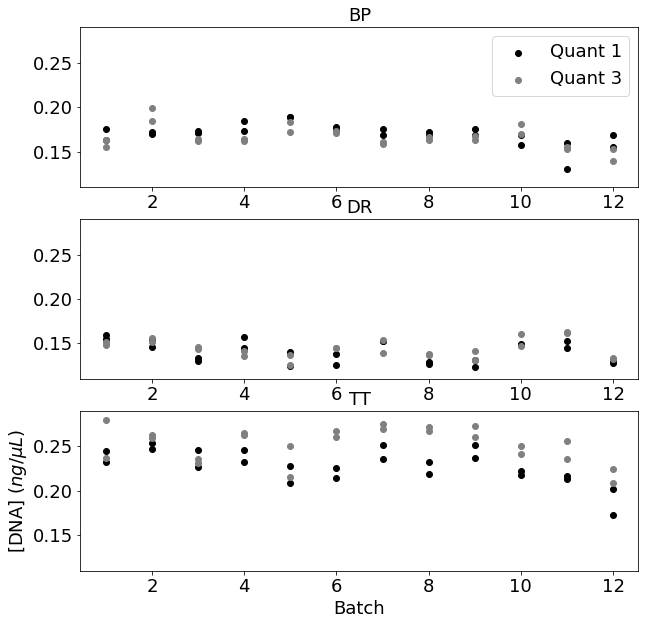

In [6]:
fontsize=18

fig,ax = plt.subplots(3,1,figsize=(10,10))

for n in np.arange(1,13):
    if n == 1:
        label1,label3 = 'Quant 1','Quant 3'
    else:
        label1,label3 = None,None
        
    ax[0].scatter(n,bp_dict[str(n)+'a-q1'],label=label1,c='k')
    ax[0].scatter(n,bp_dict[str(n)+'b-q1'],c='k')
    ax[0].scatter(n,bp_dict[str(n)+'a-q3'],label=label3,c='gray')
    ax[0].scatter(n,bp_dict[str(n)+'b-q3'],c='gray')
    ax[1].scatter(n,dr_dict[str(n)+'a-q1'],c='k')
    ax[1].scatter(n,dr_dict[str(n)+'b-q1'],c='k')
    ax[1].scatter(n,dr_dict[str(n)+'a-q3'],c='gray')
    ax[1].scatter(n,dr_dict[str(n)+'b-q3'],c='gray')
    ax[2].scatter(n,tt_dict[str(n)+'a-q1'],c='k')
    ax[2].scatter(n,tt_dict[str(n)+'b-q1'],c='k')
    ax[2].scatter(n,tt_dict[str(n)+'a-q3'],c='gray')
    ax[2].scatter(n,tt_dict[str(n)+'b-q3'],c='gray')

for i in np.arange(0,3):
    ax[i].set_ylim([0.11,0.29])
    
ax[0].set_title('BP')
ax[0].legend()
ax[1].set_title('DR')
ax[2].set_title('TT')
ax[2].set_xlabel('Batch')
ax[2].set_ylabel('[DNA] ($ng/\mu L$)')

plt.show()

Reformat into lists

In [7]:
a_samples_q1_bp,a_samples_q1_dr,a_samples_q1_tt = [],[],[]
b_samples_q1_bp,b_samples_q1_dr,b_samples_q1_tt = [],[],[]
a_samples_q3_bp,a_samples_q3_dr,a_samples_q3_tt = [],[],[]
b_samples_q3_bp,b_samples_q3_dr,b_samples_q3_tt = [],[],[]

for n in np.arange(1,13):
    a_samples_q1_bp.append(bp_dict[str(n)+'a-q1'])
    b_samples_q1_bp.append(bp_dict[str(n)+'b-q1'])
    a_samples_q3_bp.append(bp_dict[str(n)+'a-q3'])
    b_samples_q3_bp.append(bp_dict[str(n)+'b-q3'])
    
    a_samples_q1_dr.append(dr_dict[str(n)+'a-q1'])
    b_samples_q1_dr.append(dr_dict[str(n)+'b-q1'])
    a_samples_q3_dr.append(dr_dict[str(n)+'a-q3'])
    b_samples_q3_dr.append(dr_dict[str(n)+'b-q3'])
    
    a_samples_q1_tt.append(tt_dict[str(n)+'a-q1'])
    b_samples_q1_tt.append(tt_dict[str(n)+'b-q1'])
    a_samples_q3_tt.append(tt_dict[str(n)+'a-q3'])
    b_samples_q3_tt.append(tt_dict[str(n)+'b-q3'])

#### Decide which value to use 

To do so, calculated mean and max seperations between a & b for each IS 

In [8]:
sep_bp = np.abs(np.subtract(a_samples_q1_bp,b_samples_q1_bp))
sep_dr = np.abs(np.subtract(a_samples_q1_dr,b_samples_q1_dr))
sep_tt = np.abs(np.subtract(a_samples_q1_tt,b_samples_q1_tt))

print(np.mean(sep_bp))
print(max(sep_bp))
print(np.mean(sep_dr))
print(max(sep_dr))
print(np.mean(sep_tt))
print(max(sep_tt))

0.00862660083333333
0.029945706999999988
0.006873314250000008
0.01600546400000001
0.013703603166666663
0.03020386


In [9]:
count = 0
for s in sep_bp:
    print(s)
    if s > 1.5*np.mean(sep_bp):
        print('True')
        count += 1
    else:
        print('False')
print(count)

0.01239132799999998
False
0.0023233729999999897
False
0.001807067999999995
False
0.010971487000000002
False
0.0009035339999999836
False
0.0029687549999999896
False
0.007099198000000001
False
0.0033559840000000063
False
0.006453816000000001
False
0.011358717000000018
False
0.029945706999999988
True
0.013940242999999991
True
2


For BP, using the higher for sample 11, and the mean for sample 12

In [10]:
count = 0
for s in sep_dr:
    print(s)
    if s > 1.5*np.mean(sep_dr):
        print('True')
        count += 1
    else:
        print('False')
        
print(count)

0.004001366000000006
False
0.008131808000000018
False
0.0036141370000000173
False
0.012778555999999996
True
0.01600546400000001
True
0.012133174999999996
True
0.00025815300000001096
False
0.0028396790000000116
False
0.008519036999999993
False
0.0015489160000000113
False
0.008648114000000012
False
0.004001366000000006
False
3


For DR, using the lower for Sample 4, the mean for Sample 5, and the higher value for Sample 6

In [11]:
count = 0
for s in sep_tt:
    print(s)
    if s > 1.5*np.mean(sep_tt):
        print('True')
        count += 1
    else:
        print('False')
print(count)

0.012520403000000013
False
0.0072282749999999785
False
0.019619600999999987
False
0.013423938000000024
False
0.01884514399999998
False
0.011229640000000013
False
0.015876386999999964
False
0.013165784999999985
False
0.014972854000000008
False
0.004001366000000006
False
0.0033559850000000058
False
0.03020386
True
1


For the last TT sample we will use the higher value

In [12]:
bp_final_values,dr_final_values,tt_final_values = [],[],[]
for i in np.arange(0,len(a_samples_q1_bp)):
    # use the higher for sample 11 (index 10)
    if i == 10:
        bp_final_values.append(np.max([a_samples_q1_bp[i],b_samples_q1_bp[i]]))
    else:
        bp_final_values.append(np.mean([a_samples_q1_bp[i],b_samples_q1_bp[i]]))

for i in np.arange(0,len(a_samples_q1_dr)): 
    #use the lower for Sample 4 (index 3), and the higher value for Sample 6 (index 5)
    if i == 3:
        dr_final_values.append(np.min([a_samples_q1_dr[i],b_samples_q1_dr[i]]))
    elif i == 5:
        dr_final_values.append(np.max([a_samples_q1_dr[i],b_samples_q1_dr[i]]))
    else:
        dr_final_values.append(np.mean([a_samples_q1_dr[i],b_samples_q1_dr[i]]))

for i in np.arange(0,len(a_samples_q1_tt)):
    # use the higher for sample 12 (index 11)
    if i == 11:
        tt_final_values.append(np.max([a_samples_q1_tt[i],b_samples_q1_tt[i]]))
    else:
        tt_final_values.append(np.mean([a_samples_q1_tt[i],b_samples_q1_tt[i]]))

#### Plot concentrations using for analysis

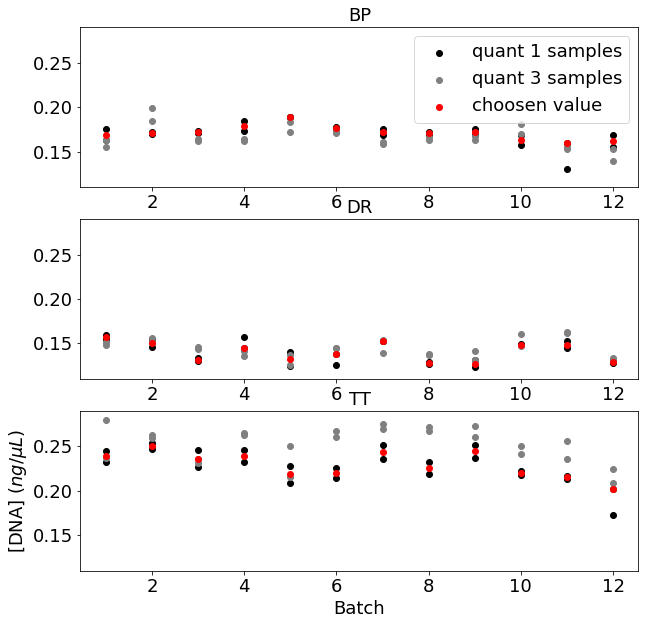

In [13]:
fontsize=18

fig,ax = plt.subplots(3,1,figsize=(10,10))

ax[0].scatter(np.arange(1,len(a_samples_q1_bp)+1),a_samples_q1_bp,label='quant 1 samples',c='k')
ax[0].scatter(np.arange(1,len(b_samples_q1_bp)+1),b_samples_q1_bp,c='k')
ax[0].scatter(np.arange(1,len(a_samples_q3_bp)+1),a_samples_q3_bp,label='quant 3 samples',c='gray')
ax[0].scatter(np.arange(1,len(b_samples_q3_bp)+1),b_samples_q3_bp,c='gray')
ax[0].scatter(np.arange(1,len(bp_final_values)+1),bp_final_values,label='choosen value',c='red')
ax[0].set_title('BP')
ax[0].legend()

ax[1].scatter(np.arange(1,len(a_samples_q1_dr)+1),a_samples_q1_dr,c='k')
ax[1].scatter(np.arange(1,len(b_samples_q1_dr)+1),b_samples_q1_dr,c='k')
ax[1].scatter(np.arange(1,len(a_samples_q3_dr)+1),a_samples_q3_dr,c='gray')
ax[1].scatter(np.arange(1,len(b_samples_q3_dr)+1),b_samples_q3_dr,c='gray')
ax[1].scatter(np.arange(1,len(dr_final_values)+1),dr_final_values,c='red')
ax[1].set_title('DR')

ax[2].scatter(np.arange(1,len(a_samples_q1_tt)+1),a_samples_q1_tt,c='k')
ax[2].scatter(np.arange(1,len(b_samples_q1_tt)+1),b_samples_q1_tt,c='k')
ax[2].scatter(np.arange(1,len(a_samples_q3_tt)+1),a_samples_q3_tt,c='gray')
ax[2].scatter(np.arange(1,len(b_samples_q3_tt)+1),b_samples_q3_tt,c='gray')
ax[2].scatter(np.arange(1,len(tt_final_values)+1),tt_final_values,c='red')

ax[2].set_title('TT')
ax[2].set_xlabel('Batch')
ax[2].set_ylabel('[DNA] ($ng/\mu L$)')

for i in np.arange(0,3):
    ax[i].set_ylim([0.11,0.29])

plt.show()

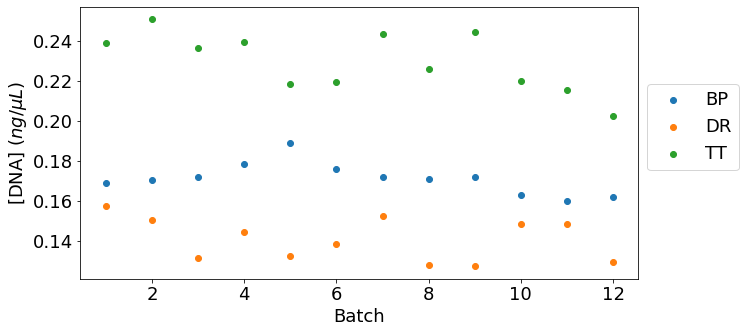

In [14]:
fontsize=18
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(np.arange(1,len(bp_final_values)+1),bp_final_values,label='BP')
ax.scatter(np.arange(1,len(dr_final_values)+1),dr_final_values,label='DR')
ax.scatter(np.arange(1,len(tt_final_values)+1),tt_final_values,label='TT')
ax.set_xlabel('Batch')
ax.set_ylabel('[DNA] ($ng/\mu L$)')
ax.legend(fontsize=fontsize,bbox_to_anchor=(1, 0.75))

#### Save data table

In [15]:
final_values = [['batch','bp(ng/muL)','dr(ng/muL)','tt(ng/muL)']]
for i in np.arange(0,len(bp_final_values)):
    final_values.append([i+1,bp_final_values[i],dr_final_values[i],tt_final_values[i]])
final_values

[['batch', 'bp(ng/muL)', 'dr(ng/muL)', 'tt(ng/muL)'],
 [1, 0.169154522, 0.157473115, 0.2390493515],
 [2, 0.1705743615, 0.150502993, 0.2507307585],
 [3, 0.171994201, 0.1315933115, 0.2362742105],
 [4, 0.1785125555, 0.144500944, 0.239242966],
 [5, 0.188967738, 0.132496846, 0.218590754],
 [6, 0.1760601055, 0.138305281, 0.21955882599999998],
 [7, 0.172187816, 0.15250367650000002, 0.2435670225],
 [8, 0.170832514, 0.12797917450000001, 0.2260771805],
 [9, 0.171994201, 0.1273337935, 0.24453509499999998],
 [10, 0.1629588585, 0.14850231, 0.220075132],
 [11, 0.159990103, 0.148695925, 0.2152347695],
 [12, 0.1620553245, 0.129463553, 0.20258529]]

In [16]:
f = open(config["data_dir"] + 'IS_quants.csv', 'w')
writer = csv.writer(f)
for row in final_values:
    writer.writerow(row)
f.close()